<a href="https://colab.research.google.com/github/Akifsula/Pusula_Akif_Emre_Sula/blob/main/drug-side-effects-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <h1 style="text-align: center;">Drug Side Effect EDA 💊</h1>

 Bu notebookta Exploratory Data Analysis (EDA) yaparak veriyi tanımak, görselleştirmek, betimsel istatistiklerine bakmak vb. işlemleri gerçekleştireceğim. Amacım Pandas, Matplotlib, Seaborn gibi kütüphaneleri kullanarak veri setini oluşturan değişkenleri tanımak ve verinin genel yapısını anlamak. Aynı zamanda histogramlar, dağılım grafikleri, ısı haritaları gibi görselleştirme teknikleri kullanarak verideki desenleri ve ilişkileri açığa çıkarmak.

In [65]:
# Gerekli kütüphaneleri içe aktarıyorum.
import numpy as np  # Sayısal işlemler
import pandas as pd  # Veri manipülasyonu
import seaborn as sns  # Görselleştirme
import matplotlib.pyplot as plt  # Görselleştirme
from itertools import combinations  # Olası kombinasyon hesabı
import random  # Rastgele değerler
from IPython.display import display  # Dataframe
import difflib  # Karşılaştırma & benzerlik
from collections import Counter  # Sayma işlemleri

# Görsel çıktılarındaki Python uyarı mesajlarını kapatıyorum.
import warnings
warnings.filterwarnings('ignore')

In [66]:
# Veri setimi içeri aktarıyorum.
file_path = 'side_effect_data 1.xlsx'

veri = pd.read_excel(file_path)
veri.head()  # Verinin ilk 5 satırı

,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
0,107,Male,1960-03-01,Turkiye,Canakkale,trifluoperazine,2022-01-09,2022-03-04,Kabizlik,2022-02-19 18:28:43,Ceviz,"Hipertansiyon, Kan Hastaliklari","Guatr, Hipertansiyon",KOAH,"Kemik Erimesi, Kalp Hastaliklari","Kemik Erimesi, Guatr",B RH-,103.0,191.0
1,140,Male,1939-10-12,Turkiye,Trabzon,fluphenazine hcl,2022-01-09,2022-03-08,Yorgunluk,2022-02-03 20:48:17,Toz,NaN,"Guatr, Diger","Hipertansiyon, Kalp Hastaliklari",,"KOAH, Diyabet",NaN,81.0,181.0
2,2,Female,1976-12-17,Turkiye,Canakkale,warfarin sodium,2022-01-11,2022-03-12,Carpinti,2022-02-04 05:29:20,Muz,"Kalp Hastaliklari, Diyabet","Diyabet, KOAH","Kemik Erimesi, Diyabet","Diyabet, Kemik Erimesi",Diger,B RH-,93.0,158.0
3,83,Male,1977-06-17,Turkiye,Adana,valproic acid,2022-01-04,2022-03-12,Sinirlilik,2022-02-08 01:01:21,Pancar,"Diyabet, Diger","Kalp Hastaliklari, Diger",NaN,Astim,"Kalp Hastaliklari, Kanser",AB RH-,NaN,165.0
4,7,Female,1976-09-03,Turkiye,Izmir,carbamazepine extended release,2022-01-13,2022-03-06,Agizda Farkli Bir Tat,2022-02-12 05:33:06,NaN,"Diyabet, Kalp Hastaliklari","Alzheimer, Hipertansiyon","Kan Hastaliklari, Kemik Erimesi","Diyabet, Diger","Alzheimer, Hipertansiyon",AB RH-,99.0,172.0


**Veri Seti Hakkında Bilgi**

Bu Veri Seti Pusula Yazılım tarafından benimle paylaşılmış olup 2357 adet hasta kayıtı içermektedir. Kayıtlar excel tablosunda tutulmaktadır. Benim bu veri setindeki amacım ise Veriyi derinlemesine analiz edip, temizleyip modellemeye hazır hale getirmektir.

In [67]:
# Verinin satır ve sutun sayısı
veri.shape

(2357, 19)

Verinin boyutuna baktığımızda 2357 satırdan ve 19 sütundan oluştuğunu görüyoruz.

**Veri setindeki öznitelikler ve ifade ettikleri**

In [113]:

# Öznitelikler ve anlamları

features_df = pd.DataFrame(data)  # DataFrame oluşturma

display(features_df)  # DataFrameleri göster


,Feature,Anlam
0,Kullanici_id,Hastanın ayırt edilmesini sağlayan id numarası
1,Cinsiyet,Hastanın cinsiyeti (Male/Female)
2,Dogum_Tarihi,Hastanın doğum tarihi
3,Uyruk,Hastanın vatandaşı olduğu ülke
4,Il,Hastanın yaşadığı il
5,Ilac_Adi,Kullanılan ilaç adı
6,Ilac_Baslangic_Tarihi,İlacın başlangıç tarihi
7,Ilac_Bitis_Tarihi,İlacın bitiş tarihi
8,Yan_Etki,Hastada görülen yan etkiler
9,Yan_Etki_Bildirim_Tarihi,Yan etki bildiriminin tarihi


In [68]:
# Veri setinin yapısal bilgileri
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2357 entries, 0 to 2356
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Kullanici_id                      2357 non-null   int64         
 1   Cinsiyet                          1579 non-null   object        
 2   Dogum_Tarihi                      2357 non-null   datetime64[ns]
 3   Uyruk                             2357 non-null   object        
 4   Il                                2130 non-null   object        
 5   Ilac_Adi                          2357 non-null   object        
 6   Ilac_Baslangic_Tarihi             2357 non-null   datetime64[ns]
 7   Ilac_Bitis_Tarihi                 2357 non-null   datetime64[ns]
 8   Yan_Etki                          2357 non-null   object        
 9   Yan_Etki_Bildirim_Tarihi          2357 non-null   datetime64[ns]
 10  Alerjilerim                       1873 non-null 

Yukarıda gördüğüm verilere dayanarak bu veri setinin ilaç kullanan bireyler ve bu bireylerin üzerindeki etkilerine dair bir veri seti olduğunu anlıyorum. Aynı zamanda bireylere ve ailelerine ait de pek çok bilgi mevcut.

In [69]:
# Veri setinin kategori bilgileri
veri.columns

Index(['Kullanici_id', 'Cinsiyet', 'Dogum_Tarihi', 'Uyruk', 'Il', 'Ilac_Adi',
       'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki',
       'Yan_Etki_Bildirim_Tarihi', 'Alerjilerim', 'Kronik Hastaliklarim',
       'Baba Kronik Hastaliklari', 'Anne Kronik Hastaliklari',
       'Kiz Kardes Kronik Hastaliklari', 'Erkek Kardes Kronik Hastaliklari',
       'Kan Grubu', 'Kilo', 'Boy'],
      dtype='object')

Yukarıda şunu fark ediyorum ki tüm kategorilerin isimleri aynı formatta yazılmamış. Bu yüzden veri ön işleme aşamasında, kategori isimlerini tutarlı bir biçimde güncellemek iyi bir fikir olacaktır. Örneğin, tüm isimleri küçük harfle veya büyük harfle yazarak ve belirli bir format belirleyerek (örneğin, alt çizgi kullanarak) düzenleyebilirim.









In [70]:
# Orjinal veri setinin yapısını korumak için copy() metotu ile veri setinin yedeğini alıyorum.
df = veri.copy()

In [71]:
# Veri setindeki null bilgilerin sayıları
print(df.isnull().sum())

Kullanici_id                          0
Cinsiyet                            778
Dogum_Tarihi                          0
Uyruk                                 0
Il                                  227
Ilac_Adi                              0
Ilac_Baslangic_Tarihi                 0
Ilac_Bitis_Tarihi                     0
Yan_Etki                              0
Yan_Etki_Bildirim_Tarihi              0
Alerjilerim                         484
Kronik Hastaliklarim                392
Baba Kronik Hastaliklari            156
Anne Kronik Hastaliklari            217
Kiz Kardes Kronik Hastaliklari       97
Erkek Kardes Kronik Hastaliklari    121
Kan Grubu                           347
Kilo                                293
Boy                                 114
dtype: int64


Buradan veri setimizdeki verilerde boş değerlerin (null) olduğunu görüyorum ve hangi veriden ne kadar eksik olduğunu analiz etmiş oluyorum. İleride çeşitli değişkenlere göre bu eksik verileri gidereceğiz.

In [72]:
# Sayısal değerlerin merkezi eğilimlerini ve dağılımlarını gözlemlemek
# için describe() metotunu kullanıyorum. Bu metot eksik gözlemleri göz ardı
# eder ve kategorik (sayısal olmayan) değişkenleri de hesaba katmaz.
df.describe()

,Kullanici_id,Dogum_Tarihi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki_Bildirim_Tarihi,Kilo,Boy
count,2357.000000,2357,2357,2357,2357,2064.000000,2243.000000
mean,97.216801,1974-11-25 04:06:12.677131936,2022-01-07 10:47:36.173101312,2022-03-10 16:25:27.365294848,2022-02-10 17:09:30.742044928,80.863857,174.638431
min,1.000000,1939-10-12 00:00:00,2022-01-01 00:00:00,2022-03-02 00:00:00,2022-02-01 04:34:33,50.000000,145.000000
25%,47.000000,1959-02-05 00:00:00,2022-01-04 00:00:00,2022-03-06 00:00:00,2022-02-04 05:29:20,65.000000,160.000000
50%,97.000000,1973-09-09 00:00:00,2022-01-07 00:00:00,2022-03-11 00:00:00,2022-02-09 20:53:54,83.000000,176.000000
75%,146.000000,1992-03-24 00:00:00,2022-01-11 00:00:00,2022-03-15 00:00:00,2022-02-17 07:08:01,96.000000,187.000000
max,196.000000,2011-04-25 00:00:00,2022-01-14 00:00:00,2022-03-19 00:00:00,2022-02-19 21:47:39,110.000000,203.000000
std,57.017200,NaN,NaN,NaN,NaN,18.635269,16.516552


**Görselleştirme**

Bu aşamadan sonra seaborn ve matplotlib.pyplot gibi kütüphaneleri kullanarak ileride işimize yarayacak çeşitli görselleştirmeler ve grafikler oluşturacağım.

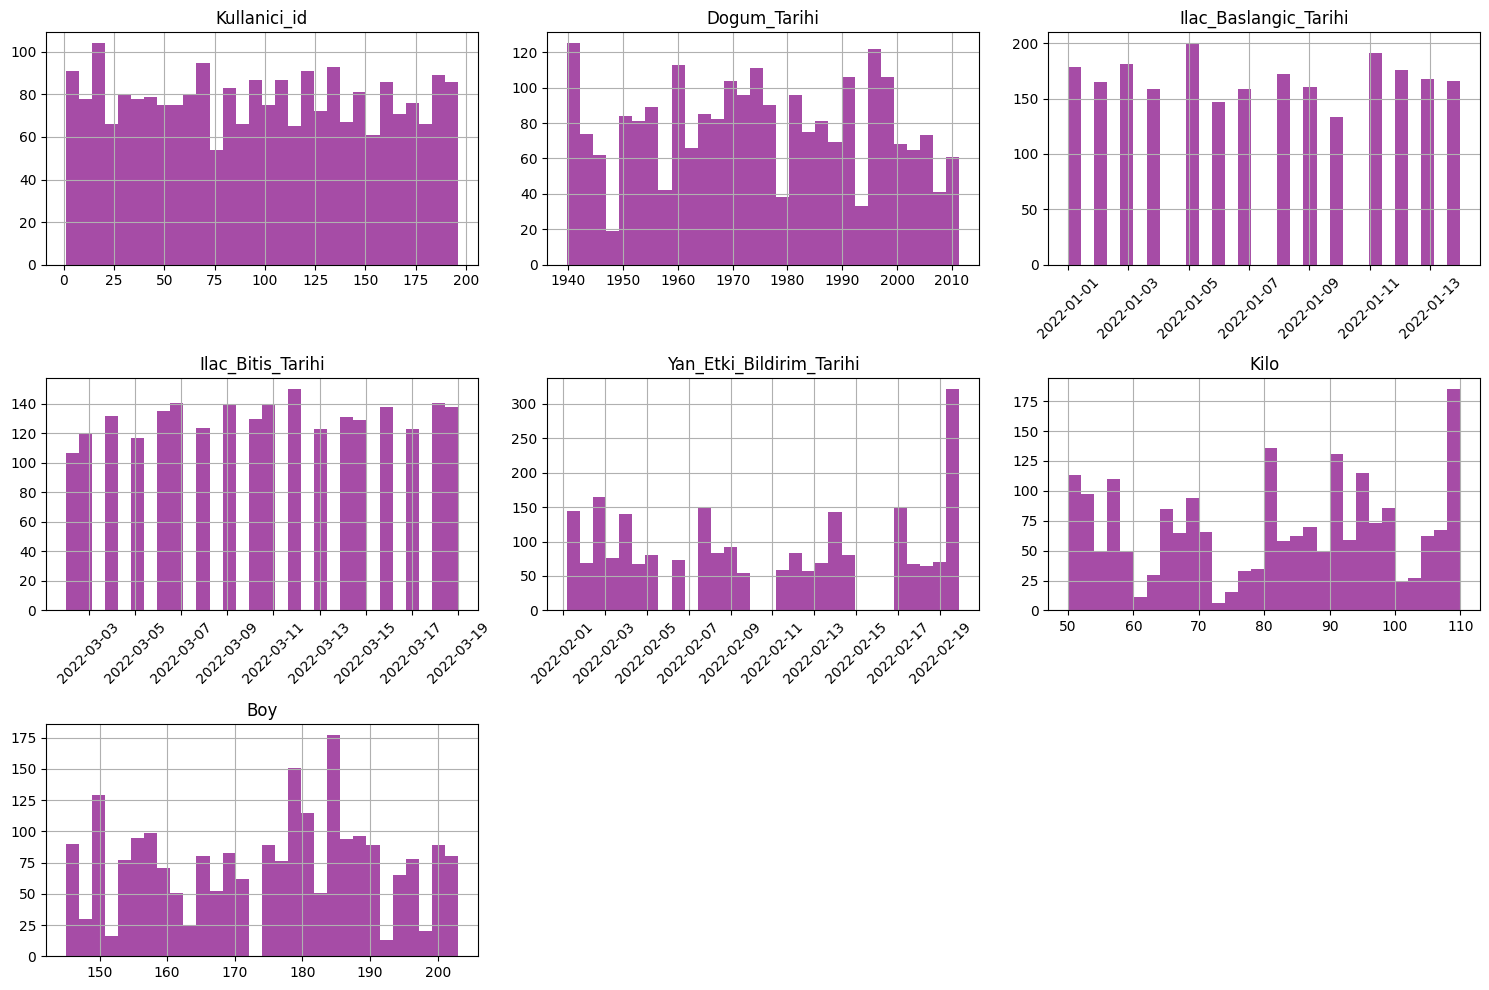

In [73]:
axes = df.hist(bins=30, figsize=(15, 10), layout=(3, 3), color="purple", alpha= 0.7)

# X eksenindeki değerlerin eğik yazılması gereken sütun isimleri
horizontal_labels = ['Ilac_Baslangic_Tarihi', 'Yan_Etki_Bildirim_Tarihi', 'Ilac_Bitis_Tarihi']

# Belirli eksenler üzerinde yatay etiketler ayarlama
for ax in axes.flatten():
    if ax.get_title() in horizontal_labels:
        ax.tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

Sayısal değerlerin grafiklerindeki birden fazla tepe noktası ve kesikli görüntüler bize verilerden anomaliler olduğunu söylüyor. İlerleyen safhalarda çeşitli metotlarla bu bozuklukları gidereceğim.

Şimdi farkı görmek adına kategorik değişkenleri de frekans grafikleri üzerinde inceleyelim. Bu işlem için dropna() metotunu kullanarak öncelikle null değerlerden kurtuluyorum ve n değerine 10 atayarak tüm verilerden ziyade en sık kullanılan  10 veri üzerinden grafik oluşturuyorum.

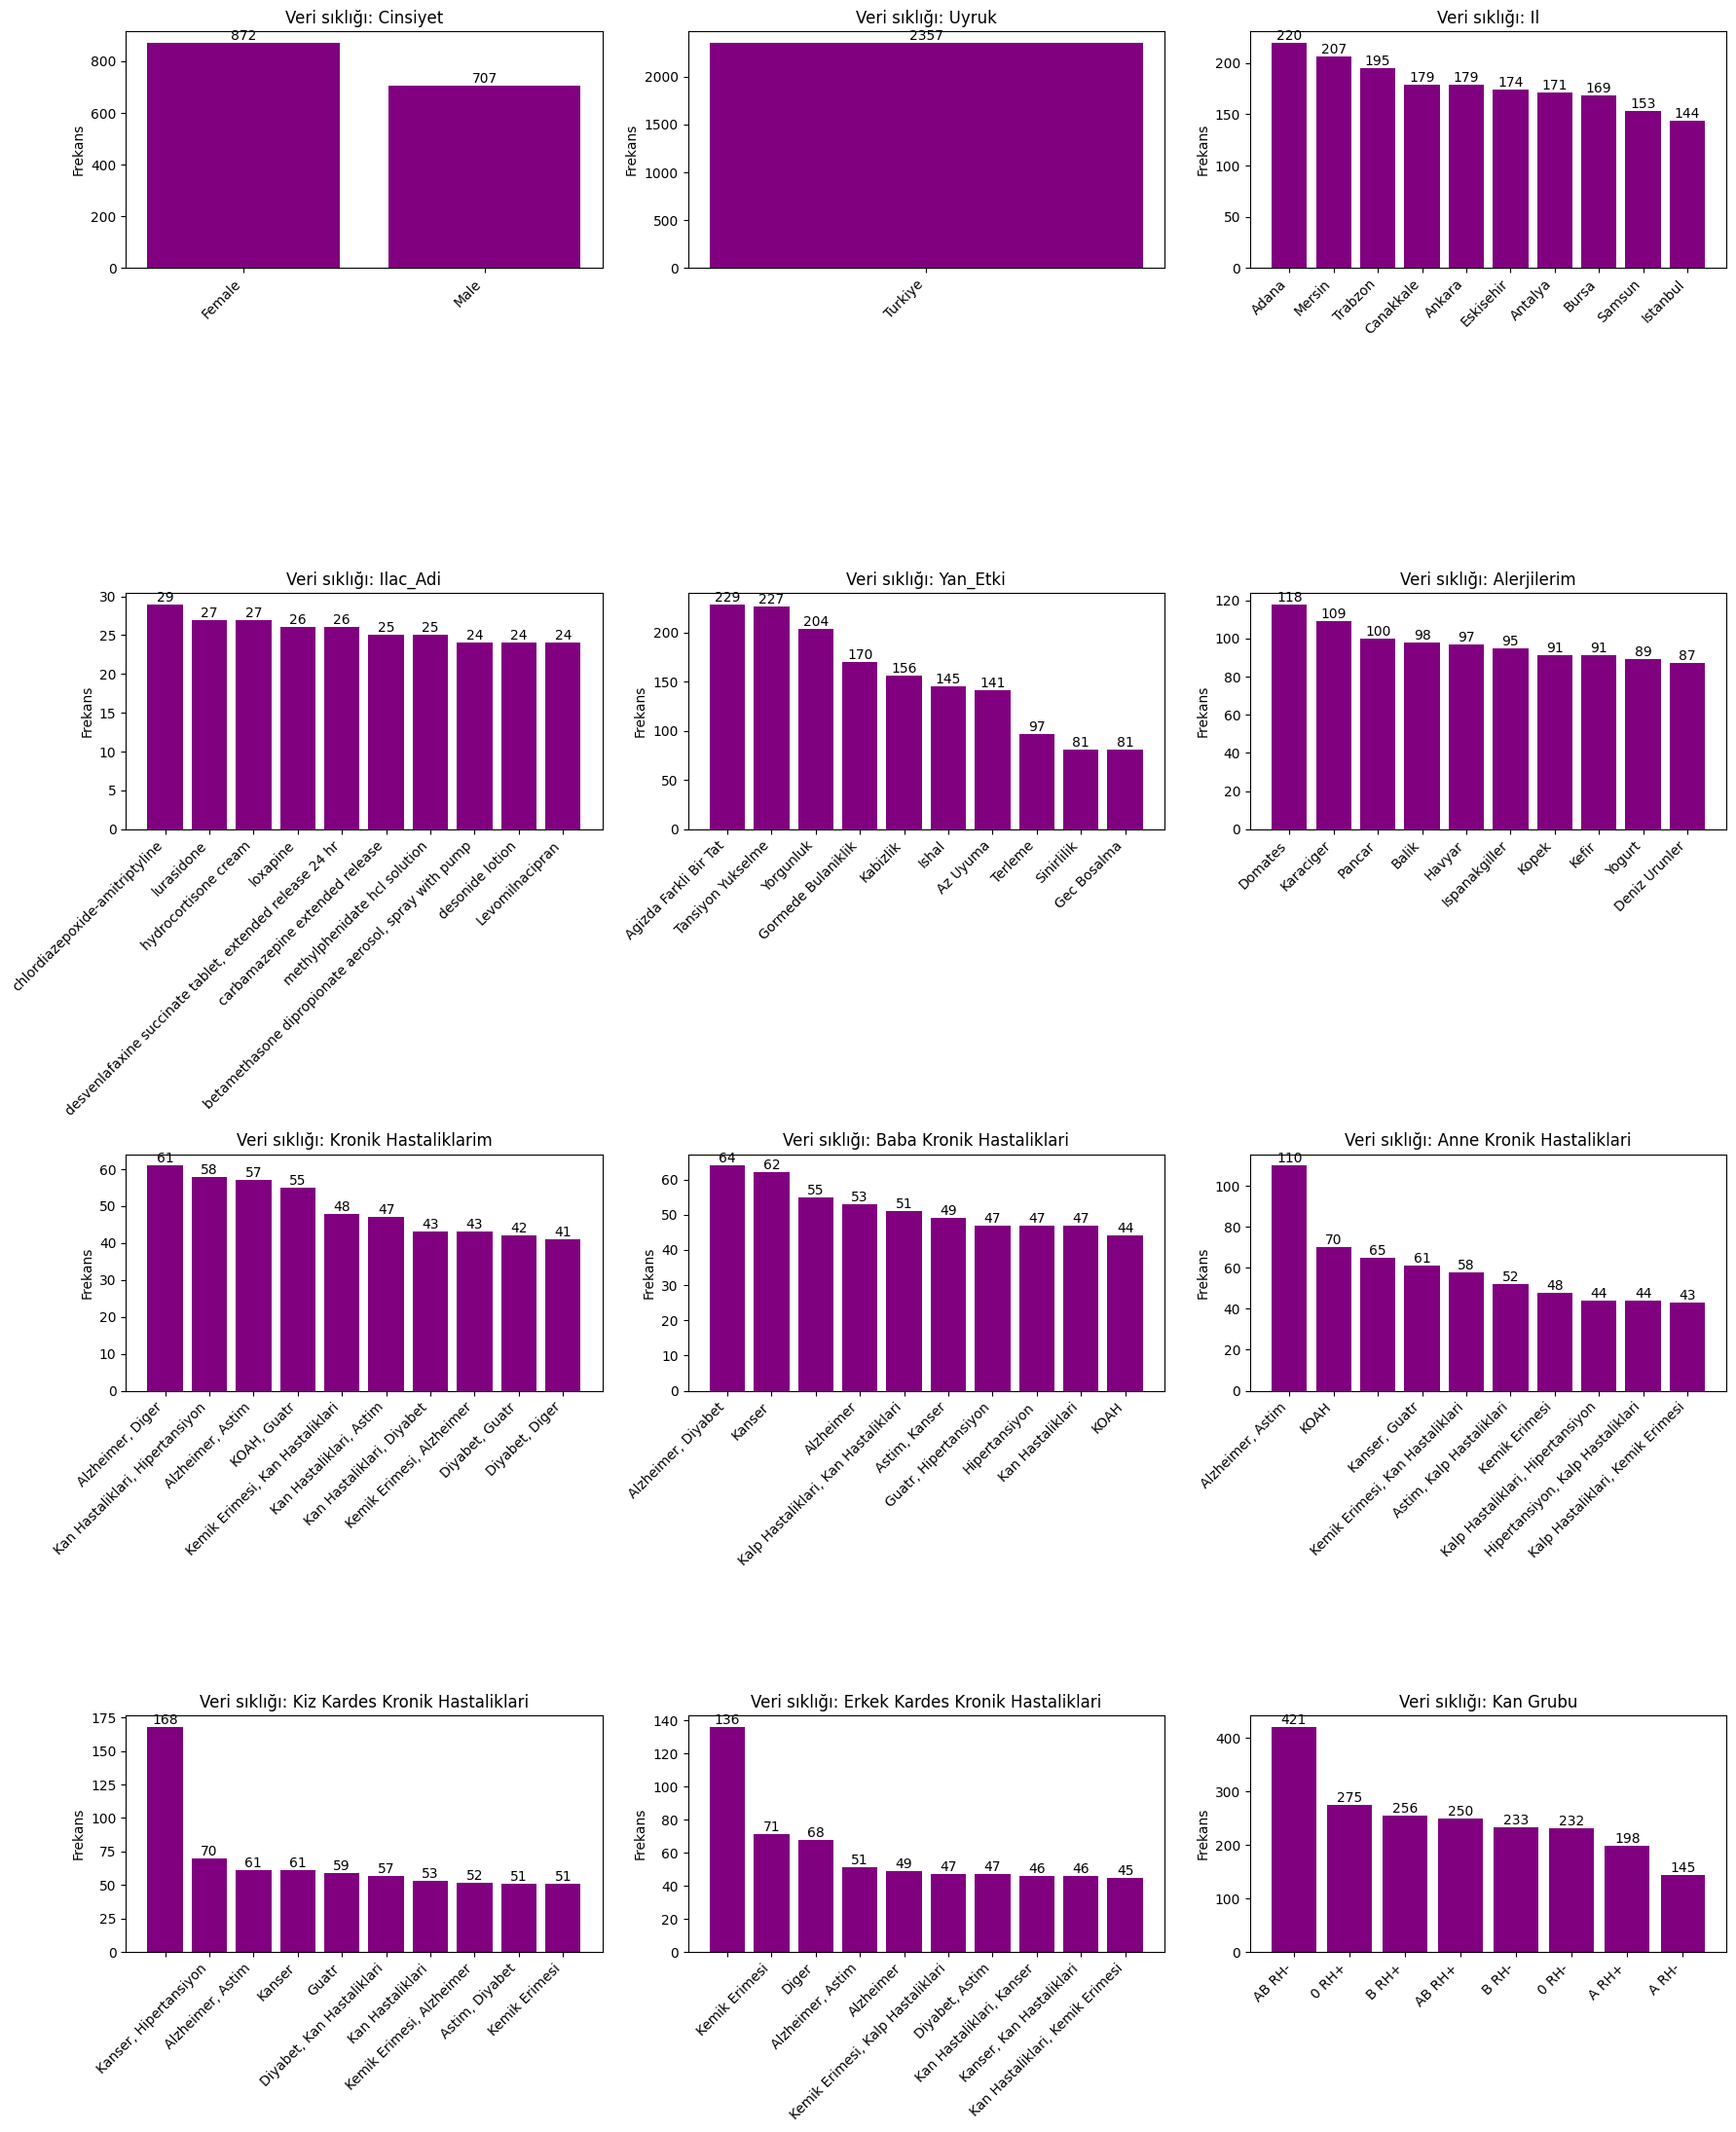

In [74]:

# Çubuk grafiği çizdirme fonksiyonu
def plotBar(degisken, n=10):
    """
       Girdi: değişken/sütun ismi
              n = gösterilecek eşsiz değer sayısı
       Çıktı: Çubuk grafiği
    """
    veri_ = veri[degisken].dropna()
    veri_sayma = veri_.value_counts()
    veri_sayma = veri_sayma[:n]

    plt.bar(veri_sayma.index, veri_sayma, color="purple")
    plt.xticks(ticks=range(len(veri_sayma.index)), labels=veri_sayma.index, rotation=45, ha='right')  # X eksenini düzenledim
    plt.ylabel("Frekans")
    plt.title(f"Veri sıklığı: {degisken}")

    # Her bir çubuğun üstüne frekans değerlerini yazalım
    for index, value in enumerate(veri_sayma):
        plt.text(index, value, str(value), ha='center', va='bottom')

# Kategorik değişkenler
kategorik_degisken = ["Cinsiyet", "Uyruk", "Il", "Ilac_Adi", "Yan_Etki", "Alerjilerim", "Kronik Hastaliklarim",
                      "Baba Kronik Hastaliklari", "Anne Kronik Hastaliklari", "Kiz Kardes Kronik Hastaliklari",
                      "Erkek Kardes Kronik Hastaliklari", "Kan Grubu"]

# Grafikleri 3'lü olarak yan yana ve toplamda 4 satır göstermek için döngü
plt.figure(figsize=(18, 22))
for i, degisken in enumerate(kategorik_degisken):
    plt.subplot(4, 3, i+1)  # 4 satır, 3 sütunluk grid düzeni
    plotBar(degisken, n=10)

plt.tight_layout()  # Sıkışmayı önlemek için layout'u düzenledim
plt.show()


Burada ilk gözüme çarpan şey: Uyruk kategorik değişkeninin tüm kayıtları aynı (Türkiye) olması. Bu değişken modelleme sürecine anlamlı bir katkı sağlamayacaktır. Çünkü değişkenin varyasyonu yok, bu da modelin o değişkenden bilgi öğrenemeyeceği anlamına gelir. Dolayısıyla, bu tür bir değişkeni veri setinden kaldırmak mantıklıdır. Veri ön işleme adımında ilk yapacağım değişikliklerden biri bu olacak.

İkinci fark edilen problem ise birden fazla kayıt tutulabilen Kronik hastalıklar kategorilerinde null değerlerin yanı sıra "Diger" kayıtının da olmasıdır. Bu spesifikleştirilmemiş değişken özellikle açıklayıcı veya tahmin edici modellerde veri anlamını azaltabilileceği için ileride bağımsız bir kategori olarak tutulabilir ya da çoklu değer birleştirmede örneğin Diyabet ve Diger aynı anda varsa her iki kategori de 1 olarak kodlanabilir.

Değinmek istediğim bir diğer nokta şu: Bazı Uzun ilaç isimleri, veri görselleştirme adımında eksen etiketlerinin üst üste binmesine veya grafikleri karmaşıklaştırmasına neden olabilir. Özellikle çubuk grafikleri veya scatter plot gibi görselleştirmelerde etiketlerin düzgün görünmemesi bir sorun olabilir. Örneğin "desvenlafaxine succinate tablet, extended release 24 hr"  isimli verinin grafiğin x ekseninde ne kadar büyük bir yer kapladığını kolaylıkla görebiliyoruz. Bu veri tekrar adlandırılarak yalnızca desvenlafaxine olarak isimlendirilebilir ya da Label Encoding, doğal dil işleme (NLP) gibi teknikler kullanılarak bu tarz verilerden daha anlamlı sonuçlar çıkartılabilir.

**Aykırı Değerler İçin Kutu Grafikleri**

Sayısal kategorilerde ileride eşleme yaparken referans alabilmek adına kutu grafiklerini oluşturuyorum. Aykırı değerler, grafikte kutuların dışına taşan noktalar olarak gösterilir.

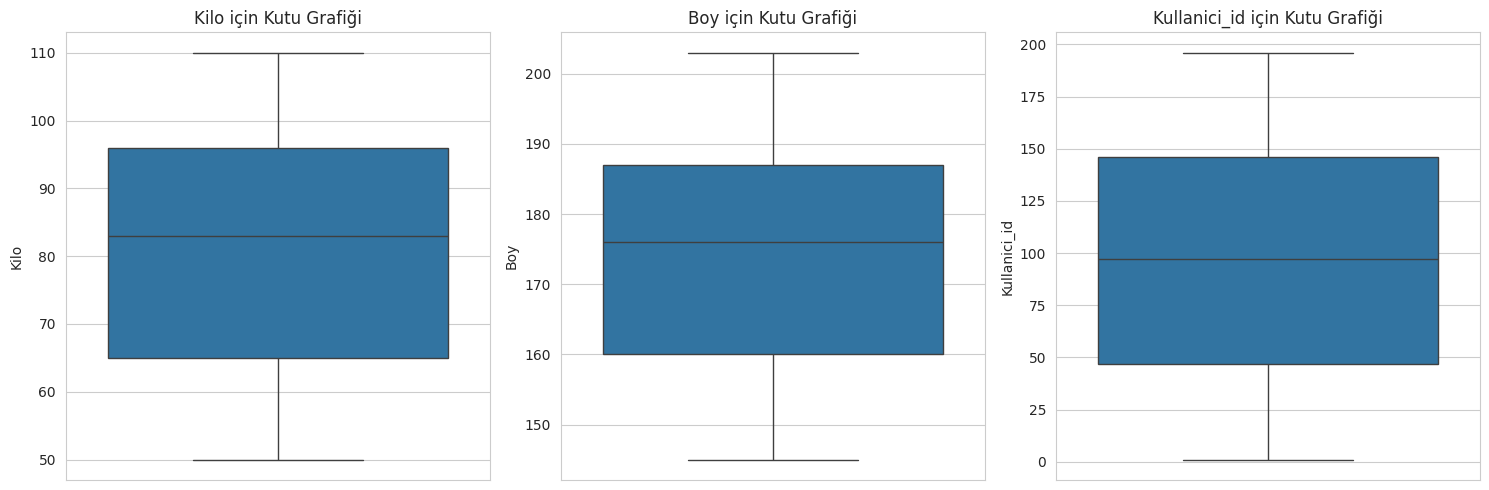

In [111]:


# Kutu grafiği oluşturmak için sayısal sütunlar
numerical_columns = ['Kilo', 'Boy', 'Kullanici_id']

# Plot düzenini ayarladım
plt.figure(figsize=(15, 5))

# Her bir sütun için kutu grafiği oluştur
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'{column} için Kutu Grafiği')

plt.tight_layout()
plt.show()


In [75]:
erkek = df[df.Cinsiyet == "Male"]
kadın = df[df.Cinsiyet == "Female"]

# Sadece Boy ve Kilo sütunlarını seçip ilk 5 satırı alalım
erkek_veri = erkek[['Boy', 'Kilo']].head(5).reset_index(drop=True)
kadın_veri = kadın[['Boy', 'Kilo']].head(5).reset_index(drop=True)

# İki veri çerçevesini yan yana birleştirelim
yan_yana = pd.concat([erkek_veri, kadın_veri], axis=1)

# Sütunları yeniden isimlendirelim
yan_yana.columns = ['Erkek Boy', 'Erkek Kilo', 'Kadın Boy', 'Kadın Kilo']

# Sonuçları göster
print(yan_yana)


   Erkek Boy  Erkek Kilo  Kadın Boy  Kadın Kilo
0      191.0       103.0      158.0        93.0
1      181.0        81.0      172.0        99.0
2      165.0         NaN        NaN        91.0
3      150.0        66.0      168.0        86.0
4      160.0       105.0      150.0        92.0


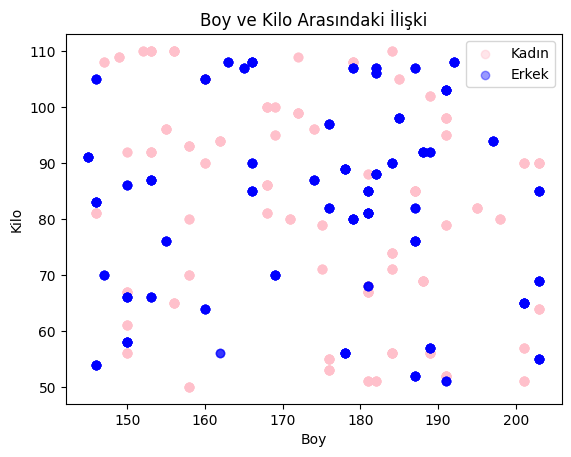

In [76]:
plt.figure()
plt.scatter(kadın.Boy, kadın.Kilo, alpha = 0.4, label = "Kadın", color = "pink")  # Alpha değeri biraz transparan çizmeyi sağlayacak
plt.scatter(erkek.Boy, erkek.Kilo, alpha = 0.4, label = "Erkek", color = "blue")
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.title("Boy ve Kilo Arasındaki İlişki")
plt.legend()
plt.show()

Erkek ve Kadın Boy-Kilo ilişkileri, Cinsiyet kategorisindeki null değerleri doldurmamızda yardımcı olabilir. Örneğin ilerde Cinsiyet kategorisindeki boş bir veriye değer atarken boy uzunluğunu referans alıp eğer ortalama değerin üstündeyse erkek olarak eşleme ihtimalimiz artabilir.

In [77]:
# Yan_Etki kategorisinde null değer var mı?
null_check = df['Yan_Etki'].isnull().any()
print(f"Yan_Etki kategorisinde null değer var mı? {null_check}")

# Cinsiyet kategorisinde null olmayan rastgele 10 değer al
cinsiyet_10 = df[df['Cinsiyet'].notnull()][['Cinsiyet', 'Yan_Etki']].sample(n=10, random_state=42)

print(cinsiyet_10)

Yan_Etki kategorisinde null değer var mı? False
     Cinsiyet               Yan_Etki
1823   Female                  Ishal
1191     Male           Karin Agrisi
1727   Female      Tansiyon Yukselme
770      Male               Az Uyuma
743      Male  Agizda Farkli Bir Tat
2271   Female      Tansiyon Yukselme
754      Male                  Ishal
390      Male           Istah Artisi
712    Female     Gormede Bulaniklik
87     Female  Agizda Farkli Bir Tat


Yan etki kategorisinde herhangi bir null değer olmadığını görüyoruz. Bu durum ısı haritasıyla beraber incelendiğinde Cinsiyet ve Yan etki arasında bir ilişki kurmamızı sağlayabilir ve İleride Cinsiyet kategorisinin null elemanlarına değer atarken daha doğru atamalar yapmamızı sağlayıp başarımı arttırabilir. İşte ilişkili ısı haritası:

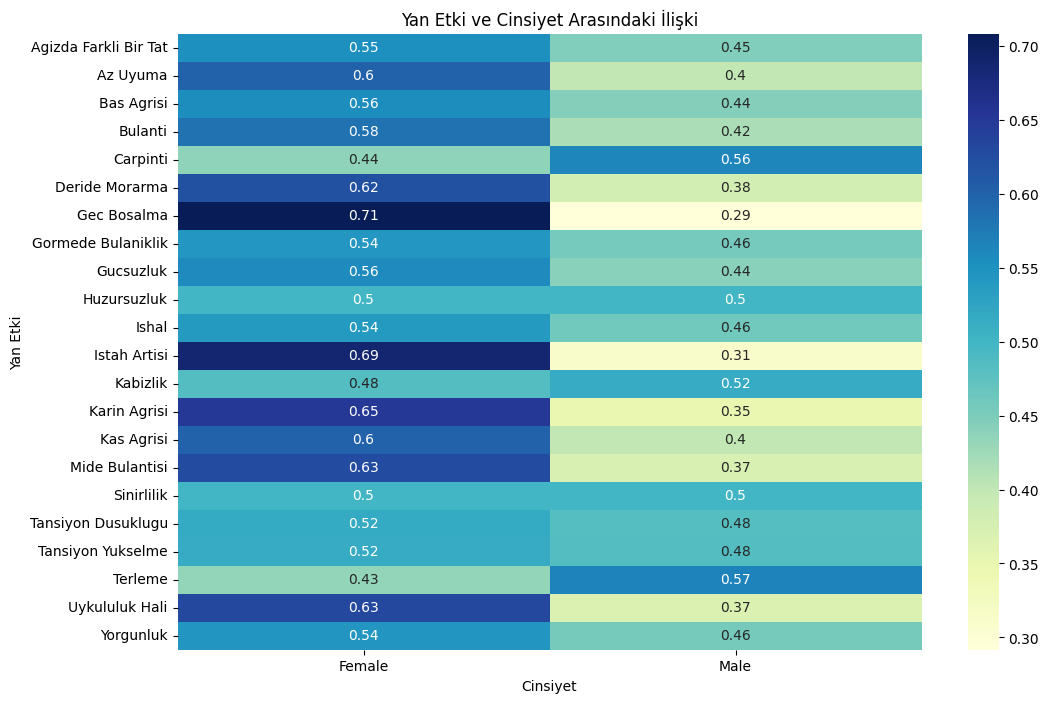

In [78]:
# Yan etki ve cinsiyet arasındaki ilişkiyi gösteren çapraz tabloyu oluşturma
crosstab = pd.crosstab(df['Yan_Etki'], df['Cinsiyet'], normalize='index')

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crosstab, annot=True, cmap="YlGnBu")

# Başlık ve etiketler
plt.title('Yan Etki ve Cinsiyet Arasındaki İlişki')
plt.xlabel('Cinsiyet')
plt.ylabel('Yan Etki')

# Grafiği göster
plt.show()

Örneğin ısı haritasında Geç Boşalma, İştah artışı ya da Uykululuk Hali gibi Yan etkileri incelersek, kadınlarda erkeklere göre çok daha fazla olduğunu görebiliriz. Dolayısıyla Atama yaparken bu gibi bulguları göz önüne alacağım.

### Değişkenlik Katsayısı

Veri setindeki değişkenlerin varyasyonunu görmek için, değişkenlik katsayılarına bakacağız. Değişkenlik katsayısı (coefficient of variation), bir değişkenin varyasyonunu, standart sapmasının ortalamaya oranı olarak ölçen bir istatistiksel ölçüttür. Genellikle yüzde (%) olarak ifade edilir.
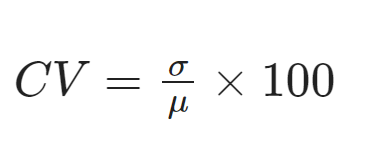

Değişkenlik katsayısının yorumu hakkında kesin bir kural yoktur. Değişkenlerin birimlerine göre yorumlamak doğru olacaktır.

Genel olarak, değişkenlik katsayısı verilerin dağılımının ne kadar homojen ya da heterojen olduğunu ve değişkenler arasındaki genel varyasyon seviyelerini gösterir. Değişkenlik katsayısı yüksek olan veriler, ortalama etrafında daha fazla yayılım gösterir ve daha fazla risk veya belirsizlik içerir.

In [79]:
# Sadece sayısal sütunları seç
sayisal_sutunlar = df.select_dtypes(include=['float64', 'int64'])

# Değişkenlik katsayısını hesapla
degiskenlik_katsayisi = sayisal_sutunlar.std() / sayisal_sutunlar.mean()
print(degiskenlik_katsayisi * 100)


Kullanici_id    58.649533
Kilo            23.045239
Boy              9.457570
dtype: float64


<Axes: >

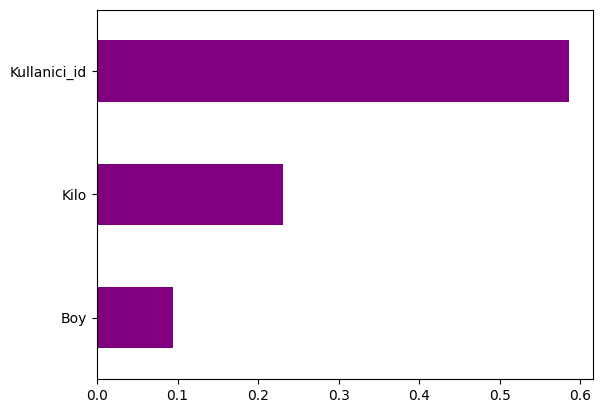

In [80]:
sirali_dk = degiskenlik_katsayisi.sort_values()
sirali_dk.plot.barh(x = 'Değişkenler', y = 'Değişkenlik Katsayısı', color = 'purple')

Tablodaki Kullanıcı_İd değişkeninin varyasyonlarının epeyce bir yüksek olduğu görülüyor. Buradaki varyasyon bu değişkenlerin değerlerinin insandan insana ne kadar değiştiğini gösterir.

Öte yandan, Boy değişkeninin düşük değişkenlik katsayısı, bu değişkenin farklı hasta örneklerinde daha tutarlı bir şekilde ölçüldüğünü ve genellikle benzer değerler aldığını gösterir.

Yani tamamen rastgele seçilen iki kayıtın boyları arasındaki farkın kullanıcı idleri arasındaki farktan daha düşük olması muhtemeldir.

# Tam/Eksiksiz Kategorilere yönelme

In [81]:
# Eksiksiz kategorileri bulmak için
eksiksiz_kategoriler = [col for col in df.columns if df[col].isnull().sum() == 0]

print("Eksiksiz Kategoriler:", eksiksiz_kategoriler)

Eksiksiz Kategoriler: ['Kullanici_id', 'Dogum_Tarihi', 'Uyruk', 'Ilac_Adi', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki', 'Yan_Etki_Bildirim_Tarihi']


Bir kategoride null değerlerin olmaması o kategorideki değerlerle başka kategorideki değerler arasında ilişki kurarken istisnaların en aza indirgenmesi demektir. Bu yüzden örneğin Ilac_Adi adlı kategoride hiç null değer olmadığı için, gerçek hayatta verilen ilaçlarda alerjilerin göz önüne alındığı bilgisinden yola çıkarak kişiye verilen ilaca göre alerjisi olmayan öge analiz edilip ona göre bir tahminde bulunulabilir.

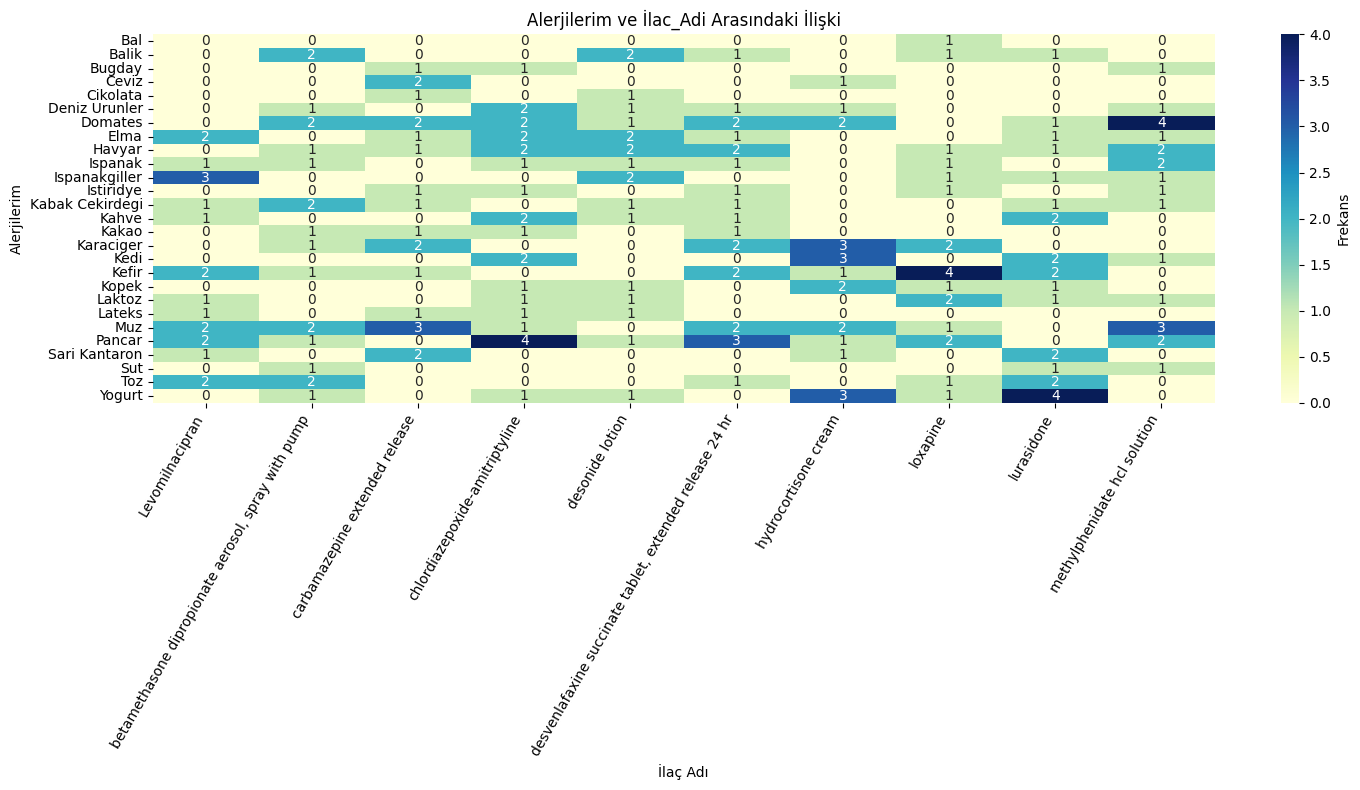

In [82]:
# En sık geçen ilaçları belirleme
en_sik_ilaclar = df['Ilac_Adi'].value_counts().head(10).index
filtered_data = df[df['Ilac_Adi'].isin(en_sik_ilaclar)]

# Alerjilerim ve Ilac_Adi arasındaki ilişki hesabı
relationship = pd.crosstab(filtered_data['Alerjilerim'], filtered_data['Ilac_Adi'])

plt.figure(figsize=(15, 8))
sns.heatmap(relationship, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Frekans'})
plt.title('Alerjilerim ve İlac_Adi Arasındaki İlişki')
plt.xlabel('İlaç Adı')
plt.ylabel('Alerjilerim')
plt.xticks(rotation=60, ha='right', fontsize=10)  # İlaç isimlerinin birbirine girmemesi için Açıyı artırdım.
plt.tight_layout()
plt.show()


Yukarıdaki ısı haritası grafiğinden yola çıkarak İçerisinde hiç null değer bulunmayan Ilac_Adi kategorisinin içerisinde null değerler barındıran Alerjilerim kategorisi ile frekans ilişkilerini inceleyip Alerjim kategorisindeki null değerlere ona göre yeni değerler atayabiliriz.

In [83]:
# Tarih bilgisi içeren sütunların verilerini incelemeye karar veriyorum.
# Son 10 veriyi almak için
son_10_veri = df[['Dogum_Tarihi', 'Ilac_Baslangic_Tarihi', 'Ilac_Bitis_Tarihi', 'Yan_Etki_Bildirim_Tarihi']].tail(10)

print(son_10_veri)


     Dogum_Tarihi Ilac_Baslangic_Tarihi Ilac_Bitis_Tarihi  \
2347   1981-08-31            2022-01-01        2022-03-16   
2348   1950-02-03            2022-01-04        2022-03-18   
2349   1957-01-04            2022-01-14        2022-03-09   
2350   1975-05-19            2022-01-07        2022-03-16   
2351   1967-07-11            2022-01-02        2022-03-07   
2352   1957-01-04            2022-01-13        2022-03-04   
2353   2004-11-09            2022-01-02        2022-03-05   
2354   1951-11-29            2022-01-02        2022-03-12   
2355   1980-01-30            2022-01-02        2022-03-08   
2356   1986-11-07            2022-01-06        2022-03-06   

     Yan_Etki_Bildirim_Tarihi  
2347      2022-02-03 20:48:17  
2348      2022-02-03 20:48:17  
2349      2022-02-08 07:55:59  
2350      2022-02-17 07:08:01  
2351      2022-02-12 19:13:43  
2352      2022-02-12 19:13:43  
2353      2022-02-19 17:39:48  
2354      2022-02-03 20:48:17  
2355      2022-02-04 05:29:20  
2356    

Tarih bilgisi içeren kategorilerin verilerini incelemeye karar verdim ve Yan_Etki_Bildirim_Tarihi isimli kategorinin değerlerinde tarih bilgisinin yanı sıra saat bilgilerinin de dakika ve saniye bilgileri de dahil girilmiş olduğunu gördüm. Aşırı Ayrıntı olarak saat ve saniye bilgileri, modelin gereksiz yere karmaşıklaşmasına neden olabilir. Özellikle bazı durumlarda bu bilgi, model için anlamlı olmayabilir.
Eğer verinin zaman bileşeni modelin başarısını artırmıyorsa, modelin karmaşıklığını artırmak yerine bu bileşeni basitleştirmek daha iyi olabilir.
Dolayısıyla bu konu da veri ön işleme aşamasında müdahale edeceğim kısımlardan birisi olacak.

**Türetilen/Tekrar eden ilaç isimleri**

Yukarıda çubuk grafiklerini incelediğim zaman ilaç adlarındaki uzun ve benzer isimler dikkatimi çekmişti. Bu yüzden Ilac_Adi kategorisini ayrı olarak incelemeye karar veriyorum ve bu kategoriden rastgele 100 örnek getirip tablo haline getiriyorum. Aşağıda rastgele bilgiler çekmek için random kütüphanesini kuruyorum ve concat() metotunu kullanarak tablodaki verileri yan yana görüntülüyorum.

In [95]:

# Ilac_Adi sütunundan rastgele 100 örnek al
sample_ilaclar = random.sample(list(df['Ilac_Adi'].dropna().unique()), 100)

# Her tablo 20 ilaç adı içeriyor
table_data = [sample_ilaclar[i:i+20] for i in range(0, 100, 20)]

# 5 tabloyu yan yana göstermek için DataFrame oluştur
tables = [pd.DataFrame(table, columns=[f'Tablo {i+1}']) for i, table in enumerate(table_data)]

# Tabloyu yan yana görüntülemek için concat kullanımı
result = pd.concat(tables, axis=1)

# Sonucu göster
display(result)

,Tablo 1,Tablo 2,Tablo 3,Tablo 4,Tablo 5
0,desoximetasone ointment,imipramine pamoate,olanzapine odt,divalproex sodium er,lorazepam vial
1,"betamethasone dipropionate aerosol, spray with...",fluoxetine,vilazodone,amitriptyline hcl,"divalproex sodium capsule, sprinkle"
2,maprotiline hcl,betamethasone valerate foam,lorazepam concentrate,zaleplon,isocarboxazid tablet
3,lorazepam injection,doxepin hcl cream,hydroxyzine,haloperidol decanoate,olanzapine
4,ziprasidone,paliperidone er,divalproeks sodyum er,halobetasol propionate cream,citalopram
5,betamethasone dipropionate cream,lorazepam,duloxetine hcl,hydrocortisone cream,"selegiline patch, transdermal 24 hours"
6,triamcinolone cream,clonazepam,carbamazepine,paroxetine er,sertraline
7,divalproex sodium,mometasone furoate ointment,mirtazapine,nortriptyline,desvenlafaxine er
8,aripiprazole,bupropion hcl,clindamycin phosphate - benzoyl peroxide,olanzapine vial,"methylphenidate suspension, extended release 2..."
9,doxepin hcl tablet,asenapine sublingual tablet,quetiapine er,thiothixene,secobarbital


Yukarıda 100 örneği detaylı incelemem sonucu bazı ilaç isimlerinin gerçekten tekrarladığını veya aynı ilacın farklı formlarına ait olup  Kullanım şekli vb gibi etkenlere göre türetildiğini fark ettim. örnekleri arttırıp teker teker incelemek de bir yöntem fakat ben tümevarım yöntemini kullanarak yukarıdaki rastgele gelen örneklerden benzer ilaç adlarının frekanslarını grafiğe döken bir kod yazmak istiyorum ve bunun için Counter ve difflib kütüphaneleri import edip gereken kodu yazıyorum. Frekansını hesaplamak için de counter() metotunu kullanıyorum.

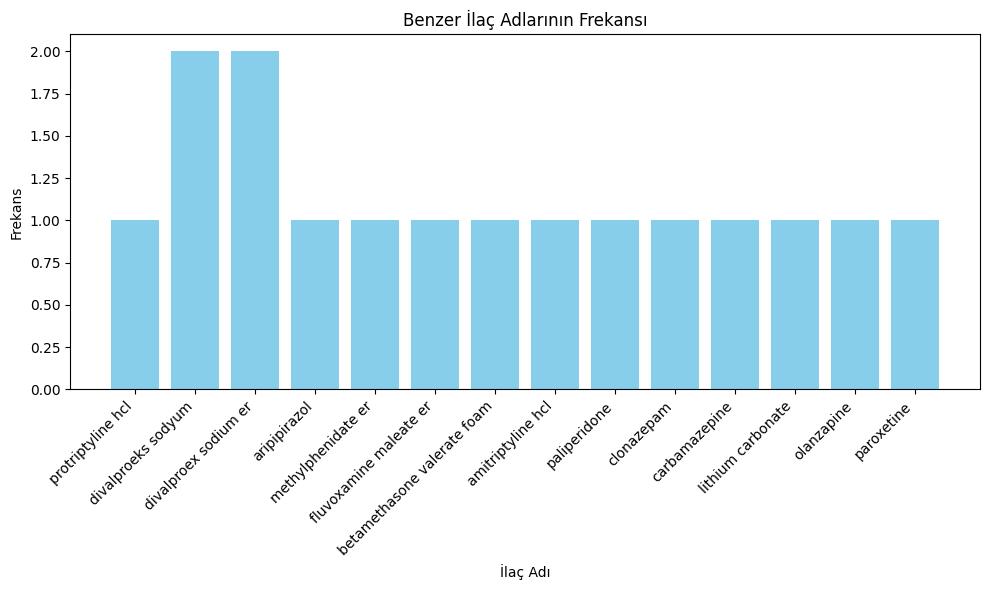

In [96]:

# İlaç adlarını tek bir listede toplama
sample_ilaclar_list = [item for sublist in table_data for item in sublist]

# Benzer ilaç adlarını bulma
benzer_ilaclar = []
for i in range(len(sample_ilaclar_list)):
    for j in range(i+1, len(sample_ilaclar_list)):
        similarity = difflib.SequenceMatcher(None, sample_ilaclar_list[i], sample_ilaclar_list[j]).ratio()
        if similarity > 0.8:  # %80 ve üzeri benzerlik olanları al
            benzer_ilaclar.append(sample_ilaclar_list[j])

# Benzer ilaç adlarının frekansını hesapla
benzer_ilaclar_frekansi = Counter(benzer_ilaclar)

# Eğer benzer ilaç adları varsa grafiğe dökelim
if benzer_ilaclar_frekansi:
    plt.figure(figsize=(10, 6))
    plt.bar(benzer_ilaclar_frekansi.keys(), benzer_ilaclar_frekansi.values(), color='skyblue')
    plt.title('Benzer İlaç Adlarının Frekansı')
    plt.xlabel('İlaç Adı')
    plt.ylabel('Frekans')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Benzer ilaç adları bulunamadı.")


Gerçekten de yukarıda gördüğümüz gibi aynı ilaca ait farklı formlar, farklı yazılışlar ya da daha uzun adlandırmalar mevcut. (Örneğin: "divalproex sodium", "divalproeks sodyum er", "divalproex sodium capsule, sprinkle")  Bu grafik rastgele gelen 100 örnek içerisinden oluşturuldu. eminim bu kadar büyük bir veri setinde örnekleri arttırırsak benzerlik ve türetilme frekansları da artacak. Yani burdan tümevarım yöntemiyle Ilac_Adi kategorisinde pek çok kez tekrarlayan ve benzer isimde uzun veriler var olduğu bilgisine ulaşıyorum. Bu durum, Overfitting sorunu oluşturabilir ve ilerleyen safhalarda daha fazla Veri Ön İşleme İhtiyacı doğurarak analiz ve yorumlamayı zorlaştırır. Sonuç olarak bu problem de veri ön işleme aşamasında özel olarak üzerinde duracağımız problemlerden birisi olacak.

In [86]:
# Yan_Etki_Bildirim_Tarihi'nin Ilac_Baslangic_Tarihi'nden eski olduğu kayıtları alma
eski_yan_etkiler = df[df['Yan_Etki_Bildirim_Tarihi'] < df['Ilac_Baslangic_Tarihi']]

# Sonucu göster
print(eski_yan_etkiler)


Empty DataFrame
Columns: [Kullanici_id, Cinsiyet, Dogum_Tarihi, Uyruk, Il, Ilac_Adi, Ilac_Baslangic_Tarihi, Ilac_Bitis_Tarihi, Yan_Etki, Yan_Etki_Bildirim_Tarihi, Alerjilerim, Kronik Hastaliklarim, Baba Kronik Hastaliklari, Anne Kronik Hastaliklari, Kiz Kardes Kronik Hastaliklari, Erkek Kardes Kronik Hastaliklari, Kan Grubu, Kilo, Boy]
Index: []


Yukarıda Tarih değerlerinin tutarlı olup olmadığını kontrol ettim. Çünkü sorgu sonucu boş değer döndürmeseydi eğer, döndürdüğü kayıt ya da kayıtları modelleme aşamasında tutarsızlığa ve yanlış bilgiye neden olacakları için almayacaktık. Sonuç olarak ilaçın yan etkisini bildirme tarihi ilaca başlama tarihinden daha eski olamaz.

In [100]:
# Hasta_id sütunundaki benzersiz değerlerin sayısını al
unique_hasta_id_count = df['Kullanici_id'].nunique()

# Toplam hasta sayısını al
total_hasta_count = df['Kullanici_id'].count()

# Kontrol yapısı
if unique_hasta_id_count == total_hasta_count:
    print("Tüm Kullanici_id değerleri birbirinden farklı.")
else:
    print("Kullanici_id değerlerinde tekrar eden kayıtlar var.")


Kullanici_id değerlerinde tekrar eden kayıtlar var.


In [103]:
# Kullanici_id'si 1 olan satırları filtrele
kullanici_1 = df[df['Kullanici_id'] == 1]

# Sonuçları göster
display(kullanici_1)


,Kullanici_id,Cinsiyet,Dogum_Tarihi,Uyruk,Il,Ilac_Adi,Ilac_Baslangic_Tarihi,Ilac_Bitis_Tarihi,Yan_Etki,Yan_Etki_Bildirim_Tarihi,Alerjilerim,Kronik Hastaliklarim,Baba Kronik Hastaliklari,Anne Kronik Hastaliklari,Kiz Kardes Kronik Hastaliklari,Erkek Kardes Kronik Hastaliklari,Kan Grubu,Kilo,Boy
345,1,NaN,1996-12-24,Turkiye,Ankara,triamcinolone cream,2022-01-11,2022-03-04,Az Uyuma,2022-02-06 14:28:54,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
461,1,NaN,1996-12-24,Turkiye,Ankara,chlorpromazine hcl,2022-01-08,2022-03-07,Kas Agrisi,2022-02-11 08:22:07,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
882,1,NaN,1996-12-24,Turkiye,Ankara,methylphenidate er,2022-01-04,2022-03-06,Bulanti,2022-02-18 05:26:31,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
902,1,NaN,1996-12-24,Turkiye,Ankara,lurasidone,2022-01-03,2022-03-05,Tansiyon Yukselme,2022-02-03 16:27:30,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
1003,1,NaN,1996-12-24,Turkiye,Ankara,imipramine hcl,2022-01-08,2022-03-10,Gormede Bulaniklik,2022-02-09 01:16:50,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
1261,1,NaN,1996-12-24,Turkiye,Ankara,amoksapin,2022-01-12,2022-03-11,Tansiyon Yukselme,2022-02-03 16:27:30,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
1278,1,NaN,1996-12-24,Turkiye,Ankara,maprotiline hcl,2022-01-07,2022-03-07,Ishal,2022-02-12 19:13:43,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
1366,1,NaN,1996-12-24,Turkiye,Ankara,fluphenazine hcl elixir,2022-01-06,2022-03-02,Uykululuk Hali,2022-02-02 23:10:47,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
1548,1,NaN,1996-12-24,Turkiye,Ankara,bupropion hcl,2022-01-11,2022-03-17,Gec Bosalma,2022-02-14 07:26:11,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0
1924,1,NaN,1996-12-24,Turkiye,Ankara,imipramine hcl,2022-01-11,2022-03-15,Bulanti,2022-02-18 05:26:31,Balik,"Kanser, Astim","Kalp Hastaliklari, Diger","Kalp Hastaliklari, KOAH","Kemik Erimesi, Diger",NaN,AB RH+,98.0,187.0


In [104]:
# Kullanici_id'si aynı olan kayıtları gruplandır
cinsiyet_kontrol = df.groupby('Kullanici_id')['Cinsiyet'].nunique()

# Farklı cinsiyet sayısı 1 olanları al
farkli_cinsiyetler = cinsiyet_kontrol[cinsiyet_kontrol > 1]

# Sonuçları göster
if not farkli_cinsiyetler.empty:
    print("Aynı Kullanici_id'ye sahip, farklı cinsiyet bilgileri bulunan kayıtlar var:")
    print(farkli_cinsiyetler)
else:
    print("Tüm Kullanici_id'leri için cinsiyet bilgileri aynı.")


Tüm Kullanici_id'leri için cinsiyet bilgileri aynı.


In [106]:
# Kontrol edilecek sütunlar
kontrol_sutunlari = ['Dogum_Tarihi', 'Il', 'Alerjilerim', 'Kronik Hastaliklarim','Baba Kronik Hastaliklari','Anne Kronik Hastaliklari','Kiz Kardes Kronik Hastaliklari','Erkek Kardes Kronik Hastaliklari', 'Kan Grubu', 'Kilo', 'Boy']

for sutun in kontrol_sutunlari:
    # Kullanici_id'si aynı olan kayıtları gruplandır
    kontrol = df.groupby('Kullanici_id')[sutun].nunique()

    # Farklı değer sayısı 1 olanları al
    farkli_degerler = kontrol[kontrol > 1]

    # Sonuçları göster
    if not farkli_degerler.empty:
        print(f"Aynı Kullanici_id'ye sahip, farklı {sutun} bilgileri bulunan kayıtlar var:")
        print(farkli_degerler)
    else:
        print(f"Tüm Kullanici_id'leri için {sutun} bilgileri aynı.")


Tüm Kullanici_id'leri için Dogum_Tarihi bilgileri aynı.
Tüm Kullanici_id'leri için Il bilgileri aynı.
Tüm Kullanici_id'leri için Alerjilerim bilgileri aynı.
Tüm Kullanici_id'leri için Kronik Hastaliklarim bilgileri aynı.
Tüm Kullanici_id'leri için Baba Kronik Hastaliklari bilgileri aynı.
Tüm Kullanici_id'leri için Anne Kronik Hastaliklari bilgileri aynı.
Tüm Kullanici_id'leri için Kiz Kardes Kronik Hastaliklari bilgileri aynı.
Tüm Kullanici_id'leri için Erkek Kardes Kronik Hastaliklari bilgileri aynı.
Tüm Kullanici_id'leri için Kan Grubu bilgileri aynı.
Tüm Kullanici_id'leri için Kilo bilgileri aynı.
Tüm Kullanici_id'leri için Boy bilgileri aynı.


Son yaptığımız kontrollerden çıkarttığımız sonuçlar şunlar:

*   Bu veri setinde birden çok kaydı olan, yani birden çok ilaç kullanıp şikayeti olan hastalar var. (Kullanici id numaralarında tekrarlamalar mevcut)
*   Bu tekrarlayan hastaların kendisine has satır bilgileri birbirinden farklı değil. Yani aynı hastaya sahip farklı bilgi yanlışlığı yok.



**Kronik Hastalık İlişkileri**

Son olarak analiz etmek istediğim şey Kronik hastalıkların birbiriyle ilişkisi ve sıklıkları. Burayı Veri Ön İşleme aşamasında daha detaylı kodlarla inceleyeceğim çünkü en başta yaptığımız çubuk grafiklerinde Kronik hastalıkların mevcut olduğu tüm kategorilerde azımsanmayacak kadar çok sayıda null değer ve Diger parametresi mevcuttu. İleride bu değerleri doldururken Kalıtsal olarak birbirlerine etki edip etmediklerini bilmek ve hangi hastalıkların birbirleriyle beraber daha sık yaşandığını görmek önemli.

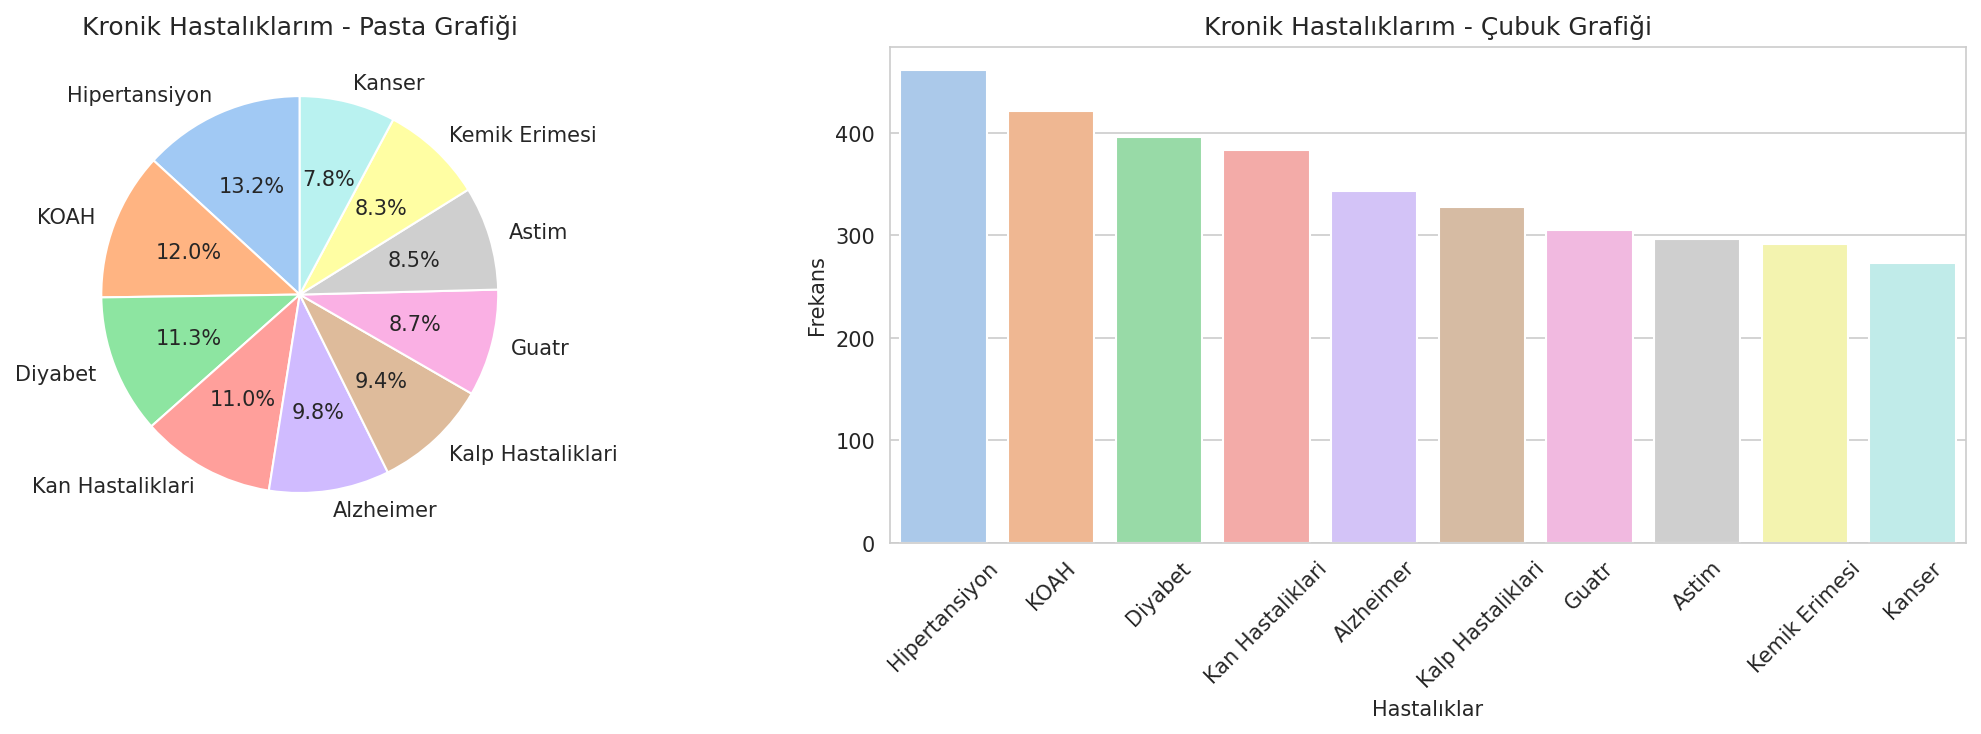

In [107]:

# Örnek veri: df['Kronik Hastalıklarım'] sütununu kullan
# Hastalıkları bir listeye ayır
hastaliklar = df['Kronik Hastaliklarim'].dropna().str.split(', ').explode()

# En sık görülen hastalıkları bul
siklik = Counter(hastaliklar).most_common(10)
hastaliklar, sayilar = zip(*siklik)

# Grafik oluşturma
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)

# Pasta grafiği
plt.subplot(121)
plt.pie(sayilar, labels=hastaliklar, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Kronik Hastalıklarım - Pasta Grafiği')

# Çubuk grafiği
plt.subplot(122)
sns.barplot(x=hastaliklar, y=sayilar, palette='pastel')
plt.title('Kronik Hastalıklarım - Çubuk Grafiği')
plt.xticks(rotation=45)
plt.ylabel('Frekans')
plt.xlabel('Hastalıklar')

plt.tight_layout()
plt.show()


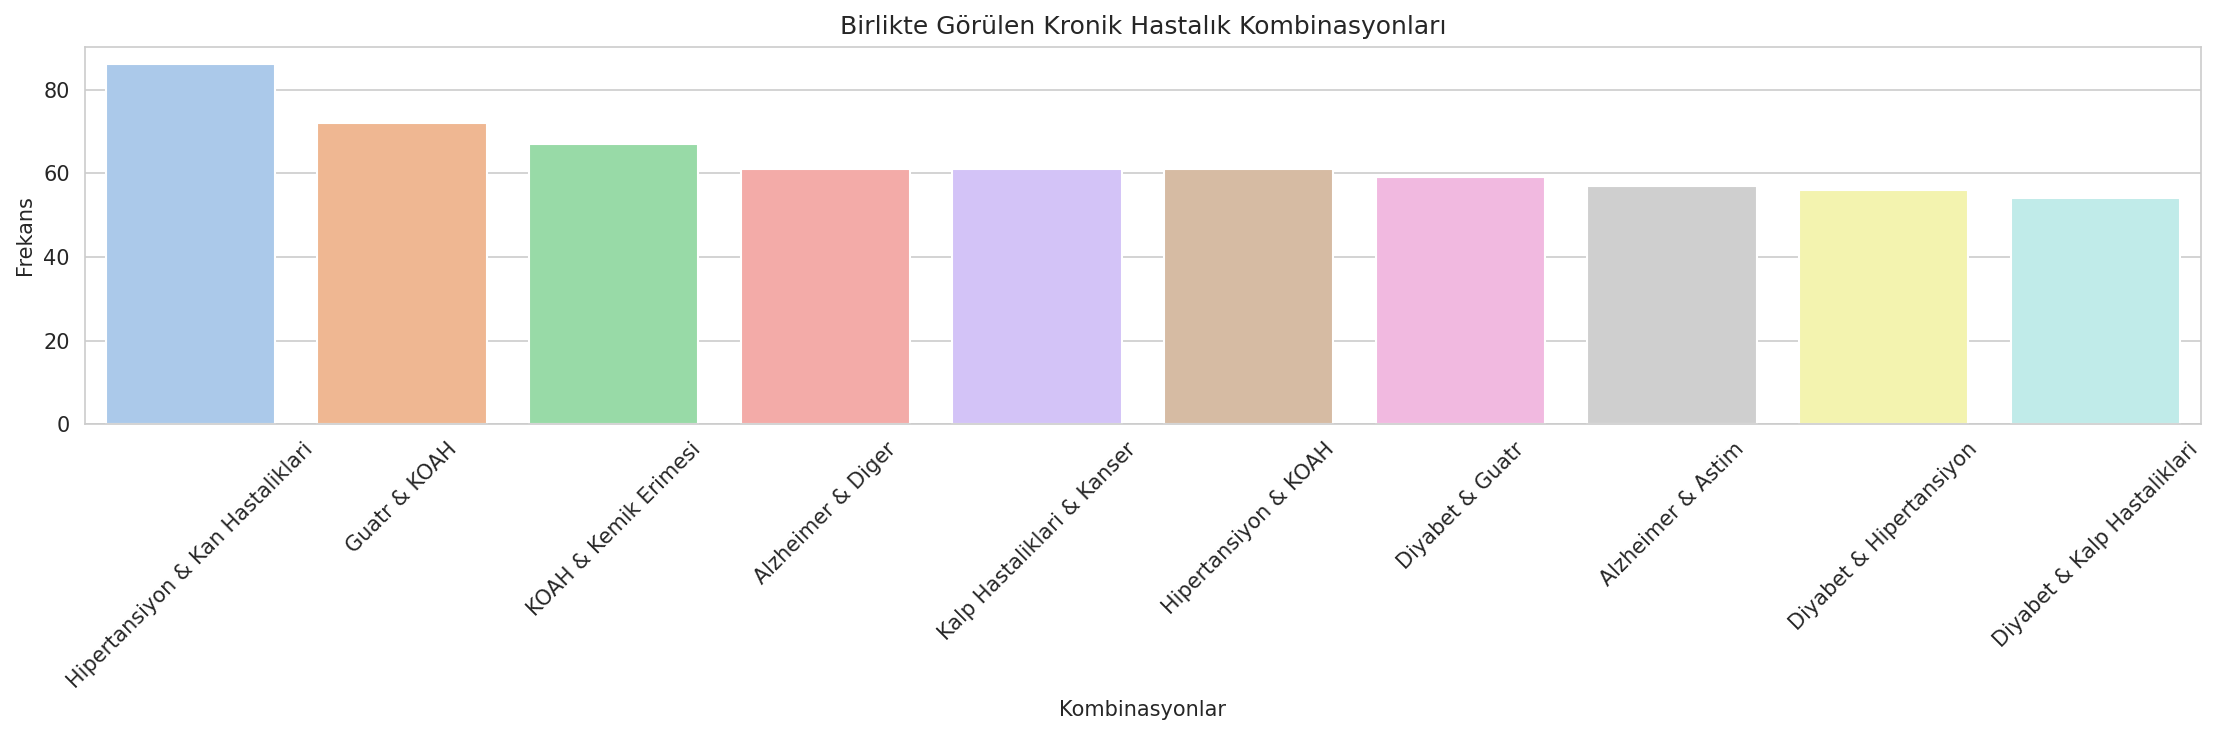

In [108]:

# Örnek veri: df['Kronik Hastalıklarım'] sütununu kullan
# Hastalıkları bir listeye ayır
hastaliklar = df['Kronik Hastaliklarim'].dropna().str.split(', ')

# İki hastalık kombinasyonlarını bul
kombinasyonlar = []
for hastalik_listesi in hastaliklar:
    if len(hastalik_listesi) > 1:  # Birden fazla hastalık varsa
        kombinasyonlar.extend(combinations(sorted(hastalik_listesi), 2))

# Kombinasyonların frekansını say
siklik = Counter(kombinasyonlar).most_common(10)
kombinasyonlar, sayilar = zip(*siklik)

# Kombinasyonları string formatında düzenle
kombinasyonlar_str = [' & '.join(k) for k in kombinasyonlar]

# Grafik oluşturma
sns.set_style('whitegrid')
plt.figure(figsize=(15, 5), dpi=150)

# Çubuk grafiği
sns.barplot(x=kombinasyonlar_str, y=sayilar, palette='pastel')
plt.title('Birlikte Görülen Kronik Hastalık Kombinasyonları')
plt.xticks(rotation=45)
plt.ylabel('Frekans')
plt.xlabel('Kombinasyonlar')

plt.tight_layout()
plt.show()


Çubuk grafiğinin ve pasta grafiğinin ortak noktalarını da ele aldığımızda Hipertansiyon bulgusunun sıkça kullanıldığını ve Kan Hastalıkları ile beraber görüldüğünü analiz ediyoruz. Koah hastalığının da sıklıkla görüldüğü sonucunu diğer hastalıklarla beraber görebiliyoruz.

---

## Kaynaklar

- [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [Seaborn Documentation](https://seaborn.pydata.org/)
- J. VanderPlas, *Python Data Science Handbook*, O'Reilly Media, 2016
- A. Müller & S. Guido, *Introduction to Machine Learning with Python*, O'Reilly Media, 2016
- https://www.kaggle.com/
- https://medium.com/global-ai-hub


---
